In [0]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules 
# Import label encoder 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
 # Read in the CSV file and convert "?" to NaN
df = pd.read_csv("/content/drive/My Drive/Code/DM/Data/data - data.csv", na_values="?" )
data1 = pd.read_csv("/content/drive/My Drive/Code/DM/Data/data - data.csv", na_values="?" )
df

,id,survey_year,name,country_name,level,discipline_group_id,discipline_group,programme_id,programme,discipline,total,girls,course_mode
0,316,2015,"Marathwada Agricultural University, Parbhani",AFGHANISTAN,Under Graduate,1,Agriculture,8,B.Agri.-Bachelor of Agriculture,Agriculture,2,0,Regular
1,316,2015,"Marathwada Agricultural University, Parbhani",FIJI,Post Graduate,1,Agriculture,111,M.Sc.-Master of Science,Agriculture,1,0,Regular
2,316,2015,"Marathwada Agricultural University, Parbhani",AFGHANISTAN,Post Graduate,1,Agriculture,111,M.Sc.-Master of Science,Agriculture,1,0,Regular
3,710,2015,NALANDA UNIVERSITY,JAPAN,Post Graduate,179,Cultural Studies,124,M.A.-Master of Arts,History,1,0,Regular
4,710,2015,NALANDA UNIVERSITY,BHUTAN,Post Graduate,179,Cultural Studies,124,M.A.-Master of Arts,History,1,0,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,56,2015,"Tezpur University, Tezpur",ETHIOPIA,Ph.D.,12,Education,157,Ph.D.-Doctor of Philosophy,Education,1,0,Distance
5398,205,2015,"Indian School of Mines, Dhanbad","TANZANIA, UNITED REPUBLIC OF",Post Graduate,25,Mining Engineering,122,M.Tech. -Master of Technology,Mining Engineering,1,0,Distance
5399,205,2015,"Indian School of Mines, Dhanbad",GHANA,Post Graduate,26,Other Engineering & Technology,122,M.Tech. -Master of Technology,Petroleum Engg,1,0,Distance
5400,205,2015,"Indian School of Mines, Dhanbad",GHANA,Post Graduate,20,Electronics Engineering,122,M.Tech. -Master of Technology,Electronics and Communication Engg,1,0,Distance


In [61]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 
df['name']= label_encoder.fit_transform(df['name']) 
df['country_name']= label_encoder.fit_transform(df['country_name']) 
df['level']= label_encoder.fit_transform(df['level']) 
df['discipline_group']= label_encoder.fit_transform(df['discipline_group']) 
df['programme']= label_encoder.fit_transform(df['programme'])
df['discipline']= label_encoder.fit_transform(df['discipline']) 
df['course_mode']= label_encoder.fit_transform(df['course_mode']) 
  
df['name'].unique()
df['country_name'].unique()
df['level'].unique()
df['discipline_group'].unique()
df['programme'].unique()
df['discipline'].unique()
df['course_mode'].unique()

df

,id,survey_year,name,country_name,level,discipline_group_id,discipline_group,programme_id,programme,discipline,total,girls,course_mode
0,316,2015,164,0,7,1,1,8,6,35,2,0,1
1,316,2015,164,39,6,1,1,111,112,35,1,0,1
2,316,2015,164,0,6,1,1,111,112,35,1,0,1
3,710,2015,173,58,6,179,29,124,69,705,1,0,1
4,710,2015,173,13,6,179,29,124,69,705,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,56,2015,255,38,5,12,37,157,116,548,1,0,0
5398,205,2015,101,123,6,25,83,122,113,1015,1,0,0
5399,205,2015,101,45,6,26,91,122,113,1074,1,0,0
5400,205,2015,101,45,6,20,39,122,113,586,1,0,0


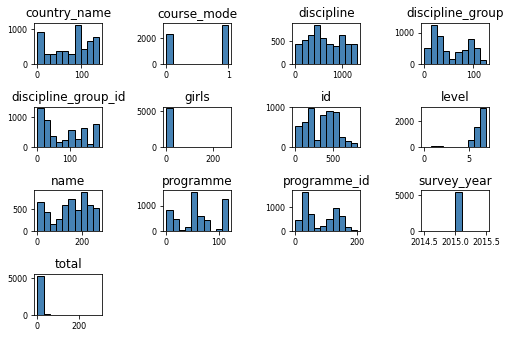

In [62]:
df.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))



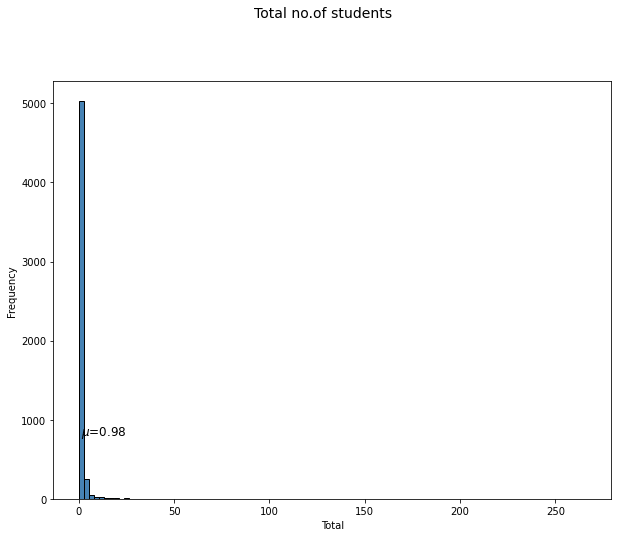

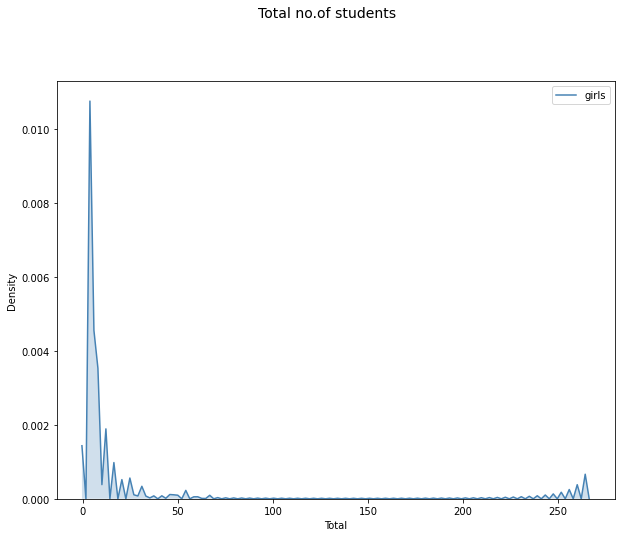

In [63]:
# Histogram
fig = plt.figure(figsize = (10,8))
title = fig.suptitle("Total no.of students", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Total")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['girls'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['girls'], color='steelblue', bins=100,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("Total no.of students", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Total")
ax1.set_ylabel("Density") 
sns.kdeplot(df['girls'], ax=ax1, shade=True, color='steelblue')

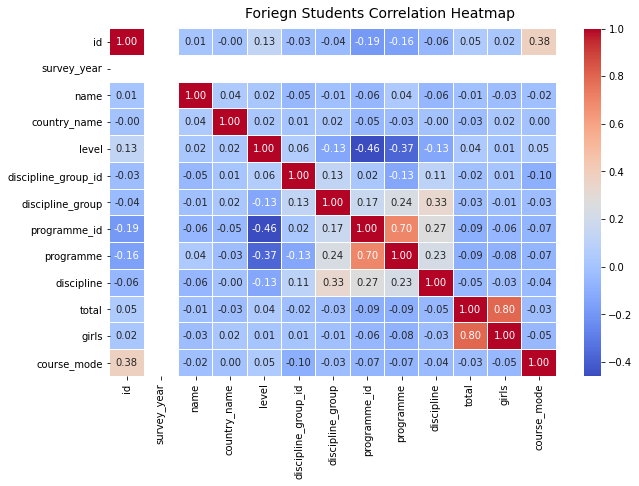

In [64]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Foriegn Students Correlation Heatmap', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1350: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


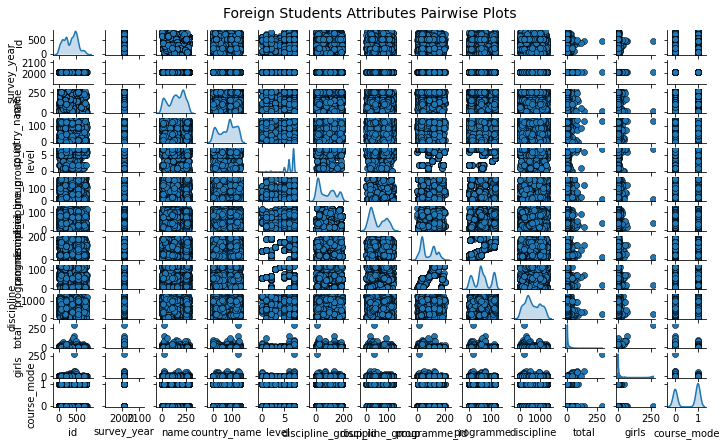

In [65]:
# Pair-wise Scatter Plots
cols = ["id", "survey_year", "name", "country_name", "level", "discipline_group_id", "discipline_group",
          "programme_id", "programme", "discipline", "total", "girls", "course_mode"]
pp = sns.pairplot(df[cols], size=0.5, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Foreign Students Attributes Pairwise Plots', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


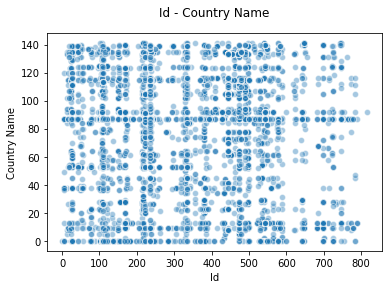

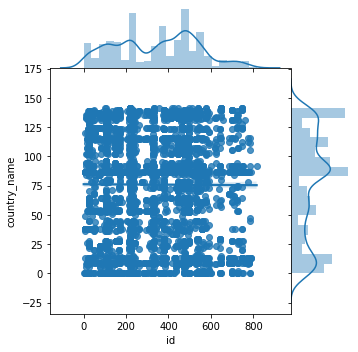

In [66]:
# Scatter Plot
plt.scatter(df['id'], df['country_name'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Id')
plt.ylabel('Country Name')
plt.title('Id - Country Name',y=1.05)


# Joint Plot
jp = sns.jointplot(x='id', y='country_name', data=df,
                   kind='reg', space=0, size=5, ratio=4)

In [0]:
#Dropping the irrelevent columns
final_data = df.drop(['id', 'survey_year', 'discipline_group_id', 'programme_id'], axis = 1)

In [0]:
#Feature Creation(Boys=total-girls)
boys =[]
girlsToBoysRatio = []
count = 0
for i in range(len(final_data['total'])):
  boysNum = final_data['total'].iloc[i] - final_data['girls'].iloc[i]
  #ratio = final_data['girls'].iloc[i] / boysNum
  boys.append(boysNum)

final_data['boys'] = boys
#final_data['ratio'] = girlsToBoysRatio

In [69]:
final_data

,name,country_name,level,discipline_group,programme,discipline,total,girls,course_mode,boys
0,164,0,7,1,6,35,2,0,1,2
1,164,39,6,1,112,35,1,0,1,1
2,164,0,6,1,112,35,1,0,1,1
3,173,58,6,29,69,705,1,0,1,1
4,173,13,6,29,69,705,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
5397,255,38,5,37,116,548,1,0,0,1
5398,101,123,6,83,113,1015,1,0,0,1
5399,101,45,6,91,113,1074,1,0,0,1
5400,101,45,6,39,113,586,1,0,0,1


In [70]:
#Function to calculate Normalized data
def Normalize(df):
    df = np.array(df)
    dfmin = np.amin(df, axis=0)
    dfmax = np.amax(df, axis=0)
    diff = dfmax - dfmin
    df = df.astype(np.float16) 
    value = 0.0000000

    for i in range(0,3):
        for j in range(0, len(df)):
            value = (df[j][i])/dfmax[i]
            df[j][i] = value
    dfNorm = pd.DataFrame(df, columns=['total', 'boys', 'girls'])
    return dfNorm

dfNorm = pd.DataFrame()
dfNorm['total'] = final_data['total']
dfNorm['boys'] = final_data['boys']
dfNorm['girls'] = final_data['girls']
dfNorm

,total,boys,girls
0,2,2,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
5397,1,1,0
5398,1,1,0
5399,1,1,0
5400,1,1,0


In [0]:
dfNorm = Normalize(dfNorm)

In [72]:
dfNorm

,total,boys,girls
0,0.006733,0.016266,0.0
1,0.003366,0.008133,0.0
2,0.003366,0.008133,0.0
3,0.003366,0.008133,0.0
4,0.003366,0.008133,0.0
...,...,...,...
5397,0.003366,0.008133,0.0
5398,0.003366,0.008133,0.0
5399,0.003366,0.008133,0.0
5400,0.003366,0.008133,0.0


In [0]:
final_data['total'] = dfNorm['total']
final_data['boys'] = dfNorm['boys']
final_data['girls'] = dfNorm['girls']

In [74]:
final_data.to_csv('post_normalize.csv')
final_data

,name,country_name,level,discipline_group,programme,discipline,total,girls,course_mode,boys
0,164,0,7,1,6,35,0.006733,0.0,1,0.016266
1,164,39,6,1,112,35,0.003366,0.0,1,0.008133
2,164,0,6,1,112,35,0.003366,0.0,1,0.008133
3,173,58,6,29,69,705,0.003366,0.0,1,0.008133
4,173,13,6,29,69,705,0.003366,0.0,1,0.008133
...,...,...,...,...,...,...,...,...,...,...
5397,255,38,5,37,116,548,0.003366,0.0,0,0.008133
5398,101,123,6,83,113,1015,0.003366,0.0,0,0.008133
5399,101,45,6,91,113,1074,0.003366,0.0,0,0.008133
5400,101,45,6,39,113,586,0.003366,0.0,0,0.008133


In [75]:
#Applying Principle Component Analysis on the data.
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

A = array(final_data)
#print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
#print(M)
# center columns by subtracting column means
C = A - M
#print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
#print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
#print(vectors)
#print(values)
# project data
P = vectors.T.dot(C.T)
#print(P.T)

#print((P.T).shape)
projected_dataset = pd.DataFrame(P.T, columns = ['name', 'country_name', 'level', 'discipline_group','programme', 'discipline', 'total', 'girls', 'boys','course_mode'])
projected_dataset.to_csv('post_pca.csv')
projected_dataset
#plot(P.T[0,:],P.T[1,:],'ob') # the data
#save.fig('post_pca.png')

,name,country_name,level,discipline_group,programme,discipline,total,girls,boys,course_mode
0,597.478629,-3.327913,74.058204,54.177096,3.191870,0.003641,-0.360269,0.014683,-0.002089,1.585533e-06
1,595.007962,-7.585934,42.403180,-32.398494,-61.894842,0.326325,-0.446490,0.010896,0.001883,3.390227e-07
2,595.000220,-6.521316,81.282863,-30.968621,-59.406462,0.338504,-0.447162,0.013438,0.003010,4.498097e-07
3,-74.178046,-24.419367,19.621891,11.201940,-23.664562,-0.100744,-0.439453,0.011255,0.000367,2.658192e-07
4,-74.186980,-23.190961,64.483065,12.851794,-20.793354,-0.086691,-0.440228,0.014188,0.001668,3.936504e-07
...,...,...,...,...,...,...,...,...,...,...
5397,82.414436,-105.321796,44.689390,-34.215748,-40.673975,-0.572135,0.510898,0.010235,0.000277,1.272938e-07
5398,-387.676920,40.059689,-45.747239,-48.609252,-15.236091,0.566953,0.519895,0.003281,-0.003205,-2.251937e-07
5399,-446.904400,41.380738,31.748873,-48.192817,-4.580679,0.608723,0.515668,0.008148,-0.000969,-7.697091e-09
5400,42.377610,47.939388,33.509018,-36.379166,-40.153438,0.481034,0.537341,0.009870,-0.000917,1.735184e-08


In [0]:
def norm_col(df):
    df = np.array(df)
    dfmin = np.amin(df, axis=0)
    dfmax = np.amax(df, axis=0)
    diff = dfmax - dfmin
    df = df.astype(np.float16) 
    value = 0.0000000

    for i in range(0,df[1].size):
        for j in range(0, len(df)):
            value = (df[j][i])/dfmax[i]
            df[j][i] = value
    dfNorm = pd.DataFrame(df)
    return dfNorm

In [0]:
#Function to calculate DBSCAN clusters
def nbr(D,p,eps):   #this fuction calclates the neighbour points within eps distance 
  nbrpts=[]
  for t in range(0,len(D)):
    if np.linalg.norm(D[p]-D[t]) < eps:
      nbrpts.append(t)
  return nbrpts

def grow(D,labels,p,nbrpts,c,eps,Minpts): #this fucntion expands the cluster
  labels[p]=c
  
  i=0
  while i< len(nbrpts):
    pn=nbrpts[i]
    if labels[pn] == -1:
      labels[pn]=c
    elif labels[pn]==0:
      labels[pn]=c
      pnnbrpts=nbr(D,pn,eps)

      if len(pnnbrpts)>=Minpts:
        nbrpts=nbrpts+pnnbrpts

    i+=1    

def dbscan(D,eps,Minpts):
  labels=[0]*len(D)
  c=0
  for p in range(0,len(D)):
    if not (labels[p]==0):
      continue
    
    nbrpts=nbr(D,p,eps)

    if len(nbrpts) < Minpts:
      labels[p]=-1
    else:
      c+= 1
      grow(D,labels,p,nbrpts,c,eps,Minpts)
  
  return labels

In [78]:
dclu=final_data #discipline_group-programme
dclu=dclu.drop(['name', 'discipline', 'level', 'girls', 'boys', 'course_mode','country_name','total'], axis = 1)
dclu=norm_col(dclu)
dclu

,0,1
0,0.007874,0.050842
1,0.007874,0.949219
2,0.007874,0.949219
3,0.228394,0.584961
4,0.228394,0.584961
...,...,...
5397,0.291260,0.982910
5398,0.653320,0.957520
5399,0.716309,0.957520
5400,0.307129,0.957520


In [79]:
X = StandardScaler().fit_transform(dclu)##programme,discipline group
my_labels = dbscan(X,0.3,50)
#my_labels

KeyboardInterrupt: ignored

In [0]:
len(set(my_labels))

In [0]:
#plt.scatter(X[:,0], X[:,1], c=my_labels)
sns.scatterplot(x="discipilne_group",y="programme",hue="continent",data=my_labels,palette=['black','green','orange','brown','dodgerblue','red'], legend='full')

In [0]:
#Association Analysis
data11=data1
data11=data11.drop(['name', 'country_name', 'discipline', 'total', 'girls', 'programme', 'id', 'survey_year', 'discipline_group_id', 'discipline_group', 'programme_id'], axis = 1)

items1=(data11['level'].unique())
items2=(data11['course_mode'].unique())
items=np.concatenate((items1,items2),axis=0)
items

In [0]:
encoded_vals = [] #one hot encoding the data
for index, row in data11.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]

ohe_df = pd.DataFrame(encoded_vals)
ohe_df

In [0]:
freq_items = apriori(ohe_df, min_support=0.05, use_colnames=True)
freq_items.head(20)

In [0]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1)
rules.head(20)

In [0]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [0]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [0]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [0]:
class LDA:
    def __init__(self):
        pass
 
    def fit(self, X, y):
            target_classes = np.unique(y)
           # print(target_classes)
            mean_vectors = []

            for cls in target_classes:
                mean_vectors.append(np.mean(X[y == cls], axis=0))

            if len(target_classes) < 3:
                mu1_mu2 = (mean_vectors[0] - mean_vectors[1]).reshape(1, X.shape[1])
                B = np.dot(mu1_mu2.T, mu1_mu2)

            s_matrix = []

            for cls, mean in enumerate(mean_vectors):
                Si = np.zeros((X.shape[1], X.shape[1]))
                for row in X[y == cls]:
                    t = (row - mean).reshape(1, X.shape[1])
                    Si += np.dot(t.T, t)
                s_matrix.append(Si)

            S = np.zeros((X.shape[1], X.shape[1]))
            for s_i in s_matrix:
                S += s_i

            S_inv = np.linalg.inv(S)

            S_inv_B = S_inv.dot(B)

            eig_vals, eig_vecs = np.linalg.eig(S_inv_B)

            idx = eig_vals.argsort()[::-1]

            eig_vals = eig_vals[idx]
            eig_vecs = eig_vecs[:, idx]

            return eig_vecs


      level  discipline
0         7          35
1         6          35
2         6          35
3         6         705
4         6         705
...     ...         ...
5397      5         548
5398      6        1015
5399      6        1074
5400      6         586
5401      7        1014

[5402 rows x 2 columns]


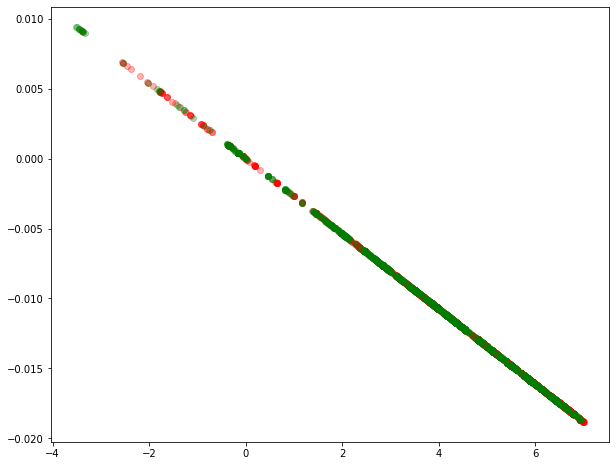

In [81]:
X = final_data.drop(["course_mode","country_name","total","girls","boys","discipline_group","name","programme"], axis=1)

print(X)
y=final_data["course_mode"]
d1=X.to_numpy()
lda = LDA()
eig_vecs = lda.fit(X.values, y)
#print(eig_vecs)
W = eig_vecs[:, :1]
#print(W)
proj=[]
c1=[]
c2=[]
colors = ['green', 'red', 'blue']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(X)):
  #ax.scatter(d1[i][0], d1[i][1], color=colors[int(y[i])], alpha=0.3)
  point=d1[i][0:3]
  
  
  proj = ((np.dot(point, W) * W) / np.dot(W.T, W))

  if (y[i]==1):
    c1.append(float(np.dot(point, W)))
  if (y[i]==0):
    c2.append(int(np.dot(point, W)))  
  ax.scatter(proj[0], proj[1], color=colors[int(y[i])], alpha=0.3)
 
plt.show()


Intersection point 1.2754654397206546


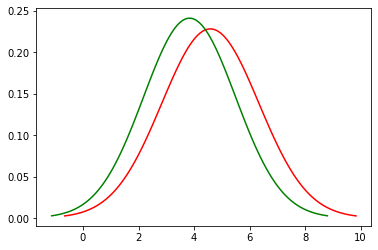

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(c1)
variance = np.var(c1)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
f=stats.norm.pdf(x, mu, sigma)
plt.plot(x, f,'r')
mu = np.mean(c2)
variance = np.var(c2)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
g=stats.norm.pdf(x, mu, sigma)
plt.plot(x,g,'g')
def solve(m1,m2,std1,std2):
  a = 1/(2*std1*2) - 1/(2*std2*2)
  b = m2/(std2*2) - m1/(std1*2)
  c = m1*2 /(2*std1*2) - m2*2 / (2*std2*2) - np.log(std2/std1)
  return np.roots([a,b,c])


m1 = np.mean(c1)
std1 = np.std(c1)
m2 = np.mean(c2)
std2 =  np.std(c2)
result = solve(m1,m2,std1,std2)                                                          


intersection=result[1]
print("Intersection point",intersection)


plt.show()

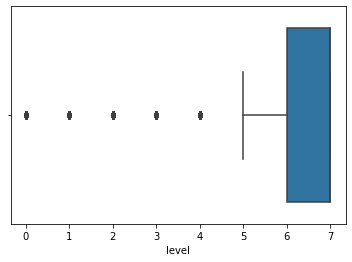

In [83]:
#outlier analysis using box plot
import seaborn as sns
sns.boxplot(x=final_data['level'])
#sns.boxplot(x=final_data['girls'])

In [84]:
#z score to find outlier
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(final_data))
threshold = 3
print(np.where(z >5))

(array([  22,   22,   27,   27,   29,   79,   79,   89,   89,   89,  178,
        178,  208,  348,  348,  787,  787,  787,  831, 1048, 1052, 1352,
       1455, 1547, 1547, 1609, 2101, 2464, 2464, 2464, 2467, 2467, 2508,
       2604, 2604, 2803, 2852, 2912, 3201, 3201, 3299, 3299, 3299, 3498,
       3498, 3736, 3847, 3847, 3847, 3848, 3848, 3892, 3892, 3895, 3895,
       3901, 3901, 3910, 3910, 3933, 3933, 3933, 3948, 3948, 3954, 3954,
       3954, 4230, 4230, 4240, 4240, 4250, 4250, 4256, 4258, 4258, 4362,
       4362, 4388, 4436, 4487, 4488, 4488, 4689, 4689, 4690, 4734, 4974,
       5155, 5155, 5155, 5165, 5401, 5401]), array([6, 9, 6, 9, 9, 6, 7, 6, 7, 9, 6, 9, 9, 6, 7, 6, 7, 9, 9, 9, 9, 9,
       9, 6, 9, 9, 9, 6, 7, 9, 6, 7, 9, 6, 9, 9, 9, 9, 6, 7, 6, 7, 9, 6,
       9, 9, 6, 7, 9, 6, 7, 6, 7, 6, 7, 6, 9, 6, 7, 6, 7, 9, 6, 7, 6, 7,
       9, 6, 9, 6, 9, 6, 9, 9, 6, 9, 6, 7, 9, 9, 9, 6, 9, 6, 9, 9, 9, 6,
       6, 7, 9, 7, 6, 9]))


In [85]:
#Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR,
Q1 = final_data.quantile(0.25)
Q3 = final_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#print(boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))

name                133.000000
country_name         77.000000
level                 1.000000
discipline_group     67.000000
programme            51.750000
discipline          631.750000
total                 0.003366
girls                 0.003759
course_mode           1.000000
boys                  0.008133
dtype: float64


In [86]:
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier.
print((final_data < (Q1 - 1.5 * IQR)) | (final_data > (Q3 + 1.5 * IQR)))


       name  country_name  level  ...  girls  course_mode   boys
0     False         False  False  ...  False        False  False
1     False         False  False  ...  False        False  False
2     False         False  False  ...  False        False  False
3     False         False  False  ...  False        False  False
4     False         False  False  ...  False        False  False
...     ...           ...    ...  ...    ...          ...    ...
5397  False         False  False  ...  False        False  False
5398  False         False  False  ...  False        False  False
5399  False         False  False  ...  False        False  False
5400  False         False  False  ...  False        False  False
5401  False         False  False  ...  False        False   True

[5402 rows x 10 columns]


In [87]:
#dataset without outliers

without_out = final_data[~((final_data < (Q1 - 1.5 * IQR)) |(final_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(final_data.shape)
without_out.shape

(5402, 10)


(4158, 10)

In [88]:
#outliers in our dataset

out= final_data[((final_data < (Q1 - 1.5 * IQR)) |(final_data > (Q3 + 1.5 * IQR))).any(axis=1)]

out

,name,country_name,level,discipline_group,programme,discipline,total,girls,course_mode,boys
10,49,87,7,79,53,940,0.043762,0.000000,1,0.105713
15,49,87,7,27,53,369,0.030304,0.000000,1,0.073181
16,49,87,7,24,53,399,0.013466,0.000000,1,0.032532
19,143,0,7,6,7,95,0.013466,0.015038,1,0.000000
20,143,0,7,8,4,255,0.013466,0.000000,1,0.032532
...,...,...,...,...,...,...,...,...,...,...
5382,154,123,7,72,67,202,0.013466,0.007519,0,0.016266
5387,129,13,7,27,53,599,0.023575,0.007519,0,0.040649
5391,129,13,7,79,53,599,0.026932,0.003759,0,0.056915
5392,129,53,5,25,116,412,0.023575,0.011276,0,0.032532
